In [1]:
from collections import Counter
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import PIL
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
clt = KMeans(n_clusters=10)

In [3]:
def show_img_compar(img_1, img_2 ):
    f, ax = plt.subplots(1, 2, figsize=(10,10))
    ax[0].imshow(img_1)
    ax[1].imshow(img_2)
    ax[0].axis('off') #hide the axis
    ax[1].axis('off')
    f.tight_layout()
    plt.show()

In [4]:
image = io.imread('~/Desktop/selam.png')
image_arr = np.array(image)
image_arr = np.reshape(image_arr, (-1, 4))
image_arr = image_arr[image_arr[:,3] > 50][:,:3]


{0: 0.24, 1: 0.09, 2: 0.13, 3: 0.04, 4: 0.05, 5: 0.11, 6: 0.03, 7: 0.12, 8: 0.11, 9: 0.07}
[[216.74294479 216.68220859 216.26114519]
 [ 94.5066054  101.40896037 104.81275129]
 [148.37768564 150.24802111 148.94459103]
 [ 45.75203252  35.03523035  30.65447154]
 [ 88.80445305  67.35624395  34.29622459]
 [122.50881057 127.13039648 127.869163  ]
 [135.624      117.328       57.1376    ]
 [196.21598101 197.1965981  197.27333861]
 [171.21079692 172.96272494 172.48157669]
 [ 55.33289125  71.08156499  86.02320955]]


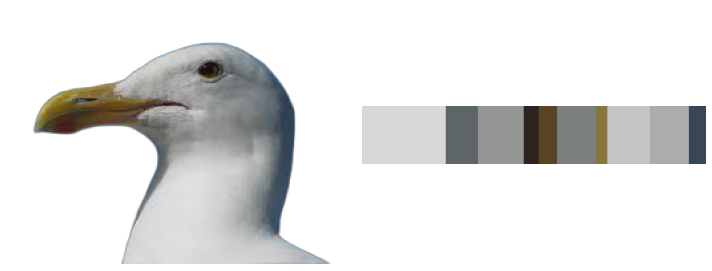

In [5]:
from collections import Counter

def palette_perc(k_cluster):
    width = 300
    palette = np.zeros((50, width, 3), np.uint8)
    
    n_pixels = len(k_cluster.labels_)
    counter = Counter(k_cluster.labels_) # count how many pixels per cluster
    perc = {}
    for i in counter:
        perc[i] = np.round(counter[i]/n_pixels, 2)
    perc = dict(sorted(perc.items()))
    
    #for logging purposes
    print(perc)
    print(k_cluster.cluster_centers_)
    
    step = 0
    
    for idx, centers in enumerate(k_cluster.cluster_centers_): 
        palette[:, step:int(step + perc[idx]*width+1), :] = centers
        step += int(perc[idx]*width+1)
        
    return palette
    
clt_1 = clt.fit(image_arr.reshape(-1, 3))
show_img_compar(image, palette_perc(clt_1))